In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import (make_scorer,
                             roc_auc_score,
                             roc_curve,
                             f1_score,
                             recall_score,
                             precision_score,
                             precision_recall_curve,
                             classification_report,
                             plot_confusion_matrix,
                             plot_roc_curve)
import joblib
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

seed = 36

In [2]:
train = pd.read_csv('../data/notebook_produced_3/train.csv')

train.head()

,pdays,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,day_of_week_wed,poutcome_failure,poutcome_success,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,-1.1,0.94601,-49.5,0.987,4963.6,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,3,-1.8,0.93369,-34.8,0.635,5008.7,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,-2.9,0.92201,-31.4,0.838,5076.2,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,-3.4,0.92379,-29.8,0.770,5017.5,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,-2.9,0.92963,-40.8,1.266,5076.2,0


### split into success and other for training and drop unnecessary columns

In [3]:
success_df = train.loc[train.poutcome_success==1, :]
success_df = success_df.drop(columns=['poutcome_failure', 'poutcome_success', 'pdays'])


other_df = train.loc[train.poutcome_success==0, :]
other_df = other_df.drop(columns=['poutcome_success'])

success_df.shape, other_df.shape

((1270, 39), (50512, 41))

## train success with gridsearch

In [ ]:
# def myGridSearchCv(df, g_params):

#     X = df.drop(columns='y')
#     y = df.y

#     names = [
#         'knn',
#         'random_forest',
#         'grad_boost',
#         'ada_boost'
#     ]

#     models = [
#         KNeighborsClassifier(),
#         RandomForestClassifier(random_state=seed),
#         GradientBoostingClassifier(random_state=seed),
#         AdaBoostClassifier(random_state=seed)
#     ]



#     for name, model, params in zip(names, models, g_params):
#         clf = GridSearchCV(
#                     model,
#                     params,
#                     scoring='roc_auc',
#                     cv=5,
#                     n_jobs=-1
#                 )
#         clf.fit(X, y)
#         print(name)
#         print(clf.best_score_)
#         print(clf.best_params_)
#         print('------------------------------')

#     return clf

# param_grid = [
#     {
#         'n_neighbors': [1, 3, 5, 7],
#         'metric': ['manhattan', 'euclidean', 'jaccard']
#     },
#     {
#         'n_estimators': [5, 6, 7, 8, 9, 10],
#         'criterion': ['gini', 'entropy'],
#         'max_depth': [5, 6, 7]
#     },
#     {
#         'learning_rate': [.008, .01, .02],
#         'n_estimators': [500, 550, 600],
#         'max_depth': [7, 8, 9]
#     },
#     {
#         'n_estimators': [10, 50, 100],
#         'learning_rate': [.5, 1., 1.5]
#     }
# ]

# poutcome_success_model = myGridSearchCv(success_df, param_grid)

In [ ]:
X = success_df.drop(columns='y')
y = success_df.y


# n_estimators = [100, 200, 300, 400]
# learning_rate = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.]

# n_estimators = [160, 170, 180, 190]
# learning_rate = [.23, .24, .25, .26, .27, .28, .29]

n_estimators = [170]
learning_rate = [.28]

params = itertools.product(n_estimators, learning_rate)
l = []
for (trees, l_rate) in params:

    model = AdaBoostClassifier(
                        n_estimators=trees,
                        learning_rate=l_rate,
                        random_state=seed)

    cv_scores = cross_validate(model, X, y,
                               cv=5, scoring='roc_auc',
                               return_train_score=True,
                               n_jobs=-1)
    test_score = cv_scores['test_score'].mean()
    train_score = cv_scores['train_score'].mean()
    l.append([f'{l_rate}, {trees}', test_score, train_score])
sss = pd.DataFrame(l, columns=['params', 'test_score', 'train_score'])
sss['diff'] = sss.train_score - sss.test_score
sss

In [ ]:
model.fit(X, y)

In [ ]:
roc_auc_score(y, model.predict(X))

In [ ]:
print(classification_report(y, model.predict(X)))

In [ ]:
plot_confusion_matrix(model, X, y,
                      display_labels=['no', 'yes'],
                      cmap=plt.cm.Blues,
                      normalize='true'
                     );

In [ ]:
# joblib.dump(model, '../saved_models/final_adaboost_poutcome_success.joblib')

## train others with gridsearch

In [ ]:
# def myGridSearchCv(df, g_params):

#     X = df.drop(columns='y')
#     y = df.y

#     names = [
# #         'knn',
#         'random_forest',
# #         'grad_boost',
# #         'ada_boost'
#     ]

#     models = [
# #         KNeighborsClassifier(),
#         RandomForestClassifier(random_state=seed),
# #         GradientBoostingClassifier(random_state=seed),
# #         AdaBoostClassifier(random_state=seed)
#     ]



#     for name, model, params in zip(names, models, g_params):
#         clf = GridSearchCV(
#                     model,
#                     params,
#                     scoring='roc_auc',
#                     cv=5,
#                     n_jobs=-1
#                 )
#         clf.fit(X, y)
#         print(name)
#         print(clf.best_score_)
#         print(clf.best_params_)
#         print('------------------------------')

#     return clf

# param_grid = [
# #     {
# #         'n_neighbors': [1, 3, 5, 7],
# #         'metric': ['manhattan', 'euclidean', 'jaccard']
# #     },
#     {
#         'n_estimators': [50, 100, 150, 200],
#         'criterion': ['gini', 'entropy'],
#         'max_depth': [15, 30, 50, 75]
#     },
# #     {
# #         'learning_rate': [.008, .01, .02],
# #         'n_estimators': [500, 550, 600],
# #         'max_depth': [7, 8, 9]
# #     },
# #     {
# #         'n_estimators': [10, 50, 100, 150],
# #         'learning_rate': [.5, 1., 1.5]
# #     }
# ]

# poutcome_success_model = myGridSearchCv(other_df, param_grid)

In [ ]:
# knn
# 0.8997897471469238
# {'metric': 'manhattan', 'n_neighbors': 7}
# ------------------------------
# random_forest
# 0.9518262234258341
# {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 200}
# ------------------------------
# grad_boost
# 0.9396368327421417
# {'learning_rate': 0.02, 'max_depth': 9, 'n_estimators': 600}
# ------------------------------
# ada_boost
# 0.8406298201536204
# {'learning_rate': 1.5, 'n_estimators': 100}
# ------------------------------

In [12]:
X = other_df.drop(columns='y')
y = other_df.y

X_train, X_test, y_train, y_test = train_test_split(
                                            X, y,
                                            test_size=0.33,
                                            stratify=y,
                                            random_state=seed)

# n_estimators = [50, 100, 150, 200]
# criterion = ['gini', 'entropy']
# max_depth = [30, 50, 75]
n_estimators = [100]
criterion = ['gini']
max_depth = [50]

params = itertools.product(n_estimators, criterion, max_depth)
l = []
for (trees, cri, m_depth) in params:

    model = RandomForestClassifier(
                        n_estimators=trees,
                        criterion=cri,
                        max_depth=m_depth,
                        random_state=seed)

    cv_scores = cross_validate(model, X_train, y_train,
                               cv=5, scoring='roc_auc',
                               return_train_score=True,
                               n_jobs=-1)
    test_score = cv_scores['test_score'].mean()
    train_score = cv_scores['train_score'].mean()
    l.append([f'{trees}, {cri}, {m_depth}', test_score, train_score])
sss = pd.DataFrame(l, columns=['params', 'test_score', 'train_score'])
sss['diff'] = sss.train_score - sss.test_score
sss

,params,test_score,train_score,diff
0,"100, gini, 50",0.944027,0.981241,0.037214


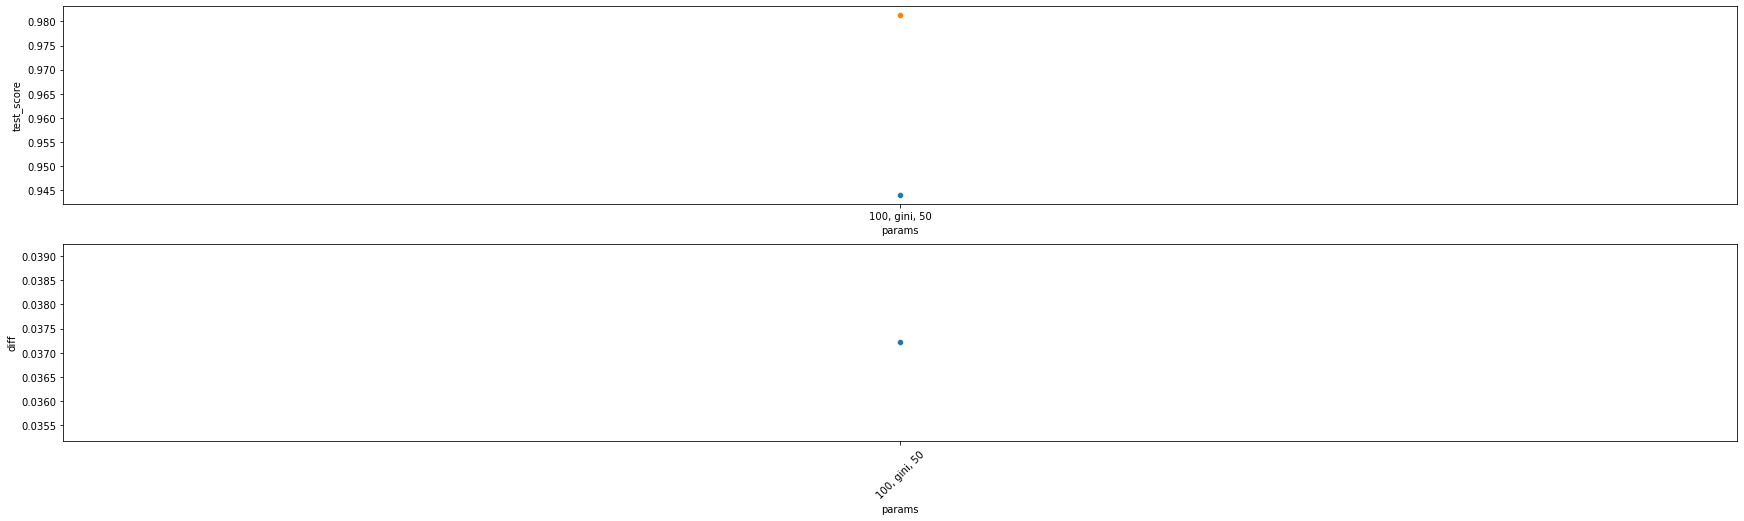

In [13]:
f, (a1, a2) = plt.subplots(nrows=2, figsize=(30, 8))
sns.scatterplot(data=sss, x='params', y='test_score', ax=a1)
sns.scatterplot(data=sss, x='params', y='train_score', ax=a1)

sns.scatterplot(data=sss, x='params', y='diff', ax=a2)
a2.tick_params(axis='x', labelrotation=45);

In [15]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, random_state=36)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      8334
           1       0.89      0.86      0.88      8335

    accuracy                           0.88     16669
   macro avg       0.88      0.88      0.88     16669
weighted avg       0.88      0.88      0.88     16669



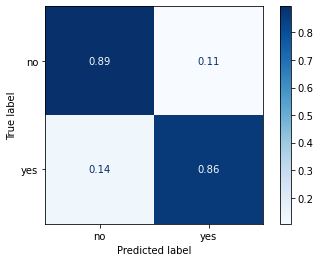

In [16]:
roc_auc_score(y_test, model.predict(X_test))

print(classification_report(y_test, model.predict(X_test)))

plot_confusion_matrix(model, X_test, y_test,
                      display_labels=['no', 'yes'],
                      cmap=plt.cm.Blues,
                      normalize='true'
                     );

In [18]:
test = pd.read_csv('../data/notebook_produced_3/test.csv')

other_df = test.loc[test.poutcome_success==0, :]
other_df = other_df.drop(columns=['poutcome_success'])

X_holdout = other_df.drop(columns='y')
y_holdout = other_df.y

X_holdout.shape, y_holdout.shape

((11946, 40), (11946,))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10813
           1       0.25      0.35      0.29      1133

    accuracy                           0.84     11946
   macro avg       0.59      0.62      0.60     11946
weighted avg       0.86      0.84      0.85     11946



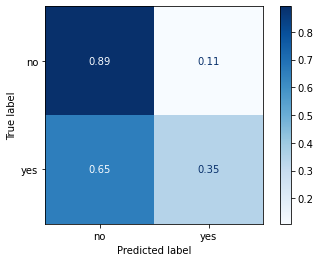

In [22]:
roc_auc_score(y_holdout, model.predict(X_holdout))

print(classification_report(y_holdout, model.predict(X_holdout)))

plot_confusion_matrix(model, X_holdout, y_holdout,
                      display_labels=['no', 'yes'],
                      cmap=plt.cm.Blues,
                      normalize='true'
                     );